# Lecture 26 practice and lab quiz

This notebook is built to help you practice using least-squares optimization both approximately on your own and also using an optimizer result to perform model fitting. We'll focus on models that are either straight lines or can linearized using a transformation.

## Import needed packages

These statements only need to be run once at the beginning of the notebook

In [1]:
from linear_fitting_functions import *

## Example

Consider the model

$$ y = C \left( x^2 + 2 \right)^a $$

Let's make a linearizing transformation for this model

$$ \ln y = \ln C + a\ln(x^2 + 2) $$

That means our $y^* = \ln y$, $C^* = \ln C$, and $x^* = \ln(x^2 + 2)$ so that

$$ y^* = ax^* + C^* $$

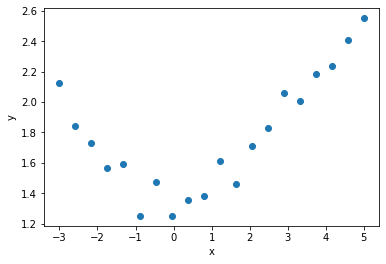

In [2]:
C_use = 1.1
a_use = 0.25
np.random.seed(1) # this makes sure the random values are the same every time you run the notebook
# set up evenly spaced x values
n_test_1 = 20
xvals_test_1 = np.linspace(-3,5,num=n_test_1)
yvals_test_1 = [C_use * (x**2.0 + 2.)**a_use + 0.075*np.random.normal() for x in xvals_test_1]

# plot the test data
plt.plot(xvals_test_1, yvals_test_1, 'o');
plt.xlabel('x');
plt.ylabel('y');

### Linearize the data and plot in the linearized variables

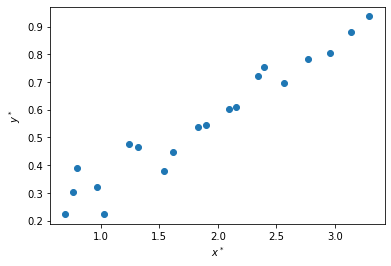

In [3]:
ystarvals_1 = np.empty(n_test_1)
xstarvals_1 = np.empty(n_test_1)
for i in range(0,n_test_1):
    ystarvals_1[i] = np.log(yvals_test_1[i])
    xstarvals_1[i] = np.log(xvals_test_1[i]**2.0 + 2)    
    
# plot the test data
plt.plot(xstarvals_1, ystarvals_1, 'o');
plt.xlabel('$x^*$');
plt.ylabel('$y^*$');

### Set up an array of $x^*$ values to predict the model at

In [4]:
npred_1 = 50
# make this range a bit larger than where we have data
xstarpred_1 = np.linspace(0.25,4,num=npred_1)

### Use the `least_squares_fit_linear` function to get a slope and intercept

             x value     residual squared
              2.3979               0.0036
              2.1577               0.0004
              1.8956               0.0003
              1.6128               0.0017
              1.3168               0.0029
              1.0298               0.0131
              0.7995               0.0122
              0.6945               0.0007
              0.7588               0.0013
              0.9644               0.0000
              1.2428               0.0070
              1.5395               0.0082
              1.8267               0.0000
              2.0942               0.0001
              2.3398               0.0019
              2.5645               0.0017
              2.7703               0.0001
              2.9595               0.0011
              3.1340               0.0000
              3.2958               0.0001
The sum of squared deviations is 0.06
And in case you need to know...
The largest absolute error is r = 0.11 
 It occu

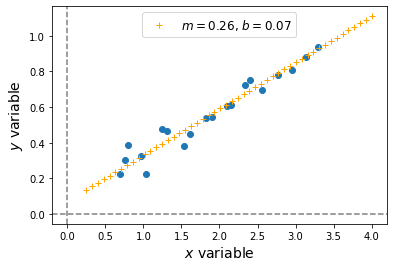

In [5]:
least_squares_fit_linear(xstarvals_1, ystarvals_1, 0.26, 0.07, xstarpred_1, display_table=True)

### Use the `least_squares_optimizer_fit_linear` starting at your guesses to find the optimal solution

After 3 iterations...
The optimization was successful! Here are the values it found:
       m =     0.2527
       b =     0.0829
             x value     residual squared
              2.3979               0.0042
              2.1577               0.0003
              1.8956               0.0002
              1.6128               0.0018
              1.3168               0.0025
              1.0298               0.0143
              0.7995               0.0106
              0.6945               0.0012
              0.7588               0.0008
              0.9644               0.0000
              1.2428               0.0063
              1.5395               0.0085
              1.8267               0.0000
              2.0942               0.0001
              2.3398               0.0023
              2.5645               0.0012
              2.7703               0.0000
              2.9595               0.0006
              3.1340               0.0000
              3.2958           

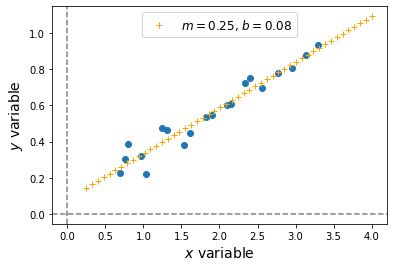

In [6]:
least_squares_optimizer_fit_linear(xstarvals_1, ystarvals_1, 0.26, 0.07, xstarpred_1, display_table=True)

### Return to the original variables and use the optimal slope and intercept you obtained

In [7]:
# make this range a bit larger than where we have data
# need another array in the original x to make new predictions
a_opt_1 = 0.2527 # optimal power is the slope
C_opt_1 = np.exp(0.0829) # optimal constant
print('Using optimal value of a=', '{:.4f}'.format(a_opt_1))
print('Using optimal value of c=', '{:.4f}'.format(C_opt_1))
xpred_1 = np.linspace(-4,6,num=npred_1)
ypred_1 = np.empty(npred_1)
for i in range(0, npred_1):
    ypred_1[i] = C_opt_1 * (xpred_1[i]**2.0 + 2.0)**a_opt_1

Using optimal value of a= 0.2527
Using optimal value of c= 1.0864


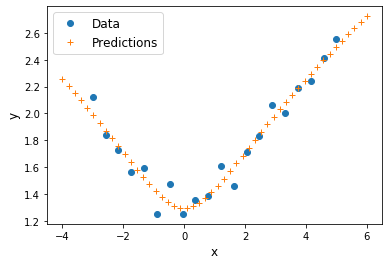

In [8]:
plt.plot(xvals_test_1, yvals_test_1, 'o', label='Data');
plt.plot(xpred_1, ypred_1, '+', label='Predictions');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);
plt.legend(fontsize=12);

Hey, not bad at all! The true values used to generate the test data were $C=1.1$ and $a=0.25$.

## Lab quiz

Based on what I did above, it's time for you to try a similar example! Consider the proposed model

$$ y = C \left(\cfrac{1}{x^2+1}\right)^a $$

Given the test data below

- linearize the model and then transform the data
- plot the linearized data
- use the `least_squares_fit_linear` to find the best coefficient values possible that minimize the sum of squared deviations
- using the values you obtained in the last part as starting guesses, use the `least_squares_optimizer_fit_linear` to find the best coefficient values possible that minimize the sum of squared deviations
- transform back to the original variables and use your optimal values to make a prediction
- use the output of the least squares fitting functions to estimate $d_{\text{max}}$ and $D$, the upper and lower bounds on the smallest possible maximum deviation $c_{\text{max}}$ obtainable using Chebyshev's criterion

**You will submit the optimal values of C and a your group obtains as well as your values of $d_{\text{max}}$ and $D$ as a lab quiz on MyClasses. You do not need to submit your notebook.** 

In [9]:
xvals_test_2 = np.array([ 0.1, 0.80714286, 1.51428571, 2.22142857, 2.92857143, 3.63571429, 
                          4.34285714, 5.05, 5.75714286, 6.46428571, 7.17142857, 7.87857143, 
                          8.58571429, 9.29285714, 10.])
yvals_test_2 = np.array([5.02773162852465, 4.204043528835038, 3.6172091181808743,
                         2.752887278160854, 2.3832702105734125, 2.2404799319806985,
                         1.7738838350483745, 1.6362877373906237, 1.5782170943986076,
                         1.414574865448969, 1.2343858108640993, 1.2530863376904555,
                         1.1684496119691024, 1.2041243773608143, 0.9238159726608044])
n_test_2 = len(yvals_test_2)

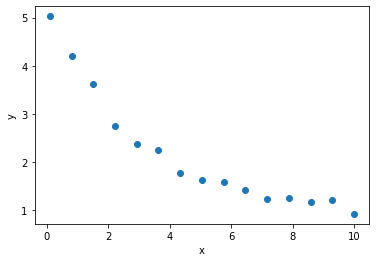

In [10]:
plt.plot(xvals_test_2, yvals_test_2, 'o');
plt.xlabel('x');
plt.ylabel('y');